In [1]:
import numpy as np
#ws14 1.
# create new low sinc filter
def sinc(length,freq):
    out = [0]*length
    x = np.linspace(-(length/2),(length/2), num = length)
    sinc = np.sinc(x*freq/np.pi)
    m = freq/np.pi
    n = 0
    norm = np.sum(sinc)
    while n<length:
        out[n]= m *(sinc[n]/m)/norm
        n+=1
    return out

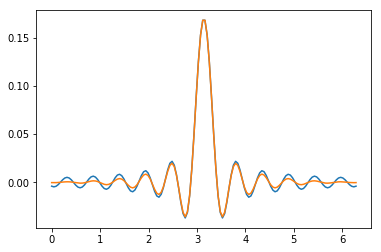

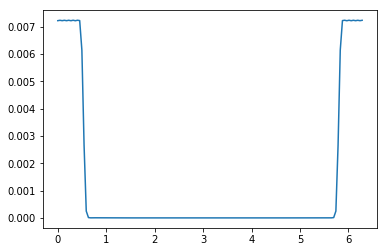

In [4]:
#ws14 2.
import matplotlib.pyplot as plt
def Hamming(N):
    m = [0]*N
    n = 0
    while n <N:
        m[n] = 0.54 - 0.46*np.cos(2*np.pi*n/(N-1))
        n+=1
    return m

di = np.pi/6
filt = sinc(140,di) 
win = Hamming(140) 
total = np.multiply(win,filt)
span=np.linspace(0,2*np.pi,len(total)) 
plt.plot(span,filt)
plt.plot(span,total)
plt.show()
fft = np.fft.fft(total) 
N = len(total)

plt.plot(span,np.abs(fft)/N)
plt.show()

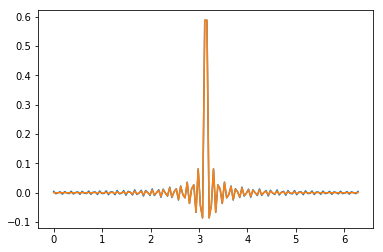

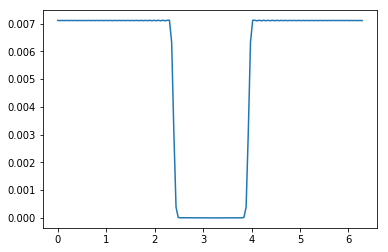

In [5]:
di = 3*np.pi/4
filt = sinc(140,di) 
win = Hamming(140) 
total = np.multiply(win,filt)
span=np.linspace(0,2*np.pi,len(total)) 
plt.plot(span,filt)
plt.plot(span,total)
plt.show()
fft = np.fft.fft(total) 
N = len(total)

plt.plot(span,np.abs(fft)/N)
plt.show()

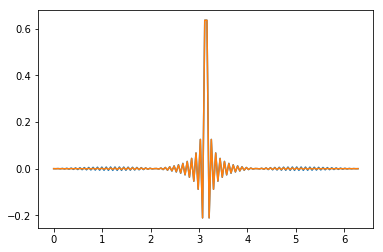

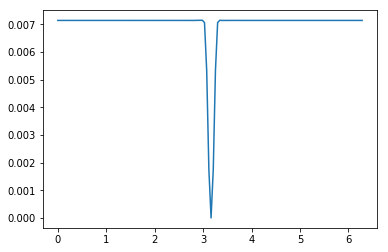

In [6]:
di = 3*np.pi
filt = sinc(140,di) 
win = Hamming(140) 
total = np.multiply(win,filt)
span=np.linspace(0,2*np.pi,len(total)) 
plt.plot(span,filt)
plt.plot(span,total)
plt.show()
fft = np.fft.fft(total) 
N = len(total)

plt.plot(span,np.abs(fft)/N)
plt.show()

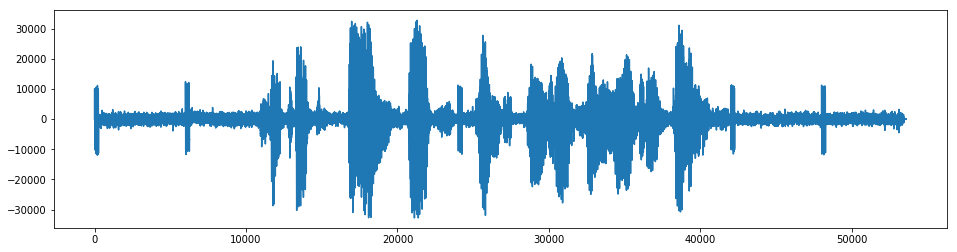

In [7]:
#Lab7 1.a)
#Import the beep fox from tyron
import IPython
from scipy.io import wavfile
plt.figure(figsize=(16,4))
fs, data = wavfile.read("Tyron_beep_fox.wav") #fs is the sampling rate
fox = data # Left Channel
plt.plot(fox)
plt.show()

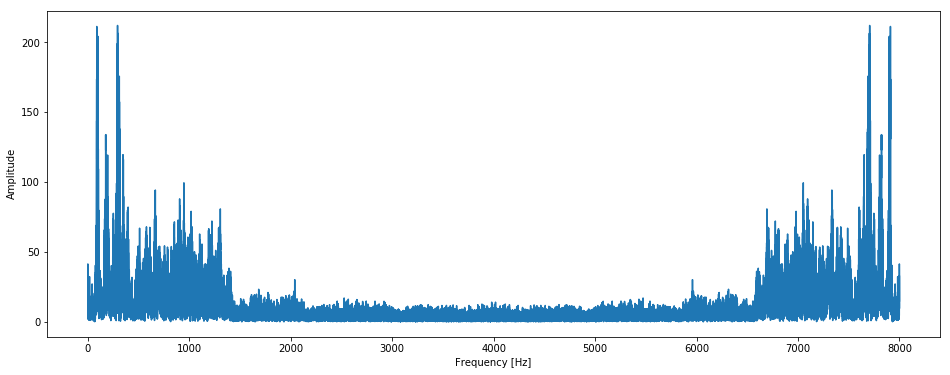

Run time: 1.094 s


In [8]:
#1.b)dft of the beep fox
import time
time_start = time.process_time()

fft = np.fft.fft(fox) 
N = len(fox)
f = np.linspace(0, fs, N) 
plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
#plt.xlim(0,2500)
plt.plot(f,np.abs(fft)/N)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

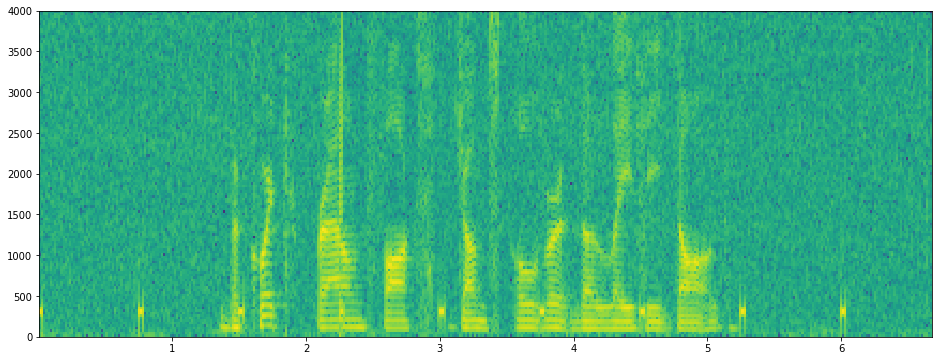

Run time: 1.906 s


In [9]:
import time
time_start = time.process_time()
plt.figure(figsize=(16,6))
plt.specgram(fox, Fs=fs)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)

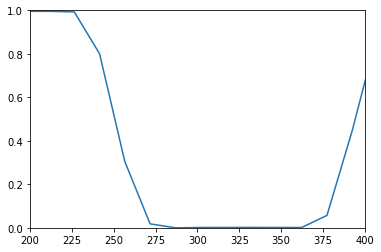

In [10]:
#1.d) design filters for beeps
#low pass filters

tw=50
N = int(3.32*fs/tw)

di = 2*np.pi*250/fs #approx location of beep by eyeball
filt = sinc(N,di) 
win = Hamming(N) 
low = np.multiply(win,filt)
#high pass
d1 = 2*np.pi*(fs/2-400)/fs #pass above 400, to give space to remove all beeps
d0 = 2*np.pi*0.5 #shifted
filth = sinc(N,d1) 
win = Hamming(N)
shifted = [0]*N
n=0
while n < N:
    shifted[n] = np.cos(n*d0)
    n+=1
high = np.multiply(win,filth)

i=0
while i < N:
    high[i]=high[i]*shifted[i]
    i+=1
    
band = [0.0]*N
j=0
while j < N:
    band[j]=low[j]+high[j]
    j+=1
    
check = np.fft.fft(band)
N = len(band)
f = np.linspace(0, fs, N) 
plt.plot(f,np.abs(check))
plt.axis([200,400,0,1])
plt.show()

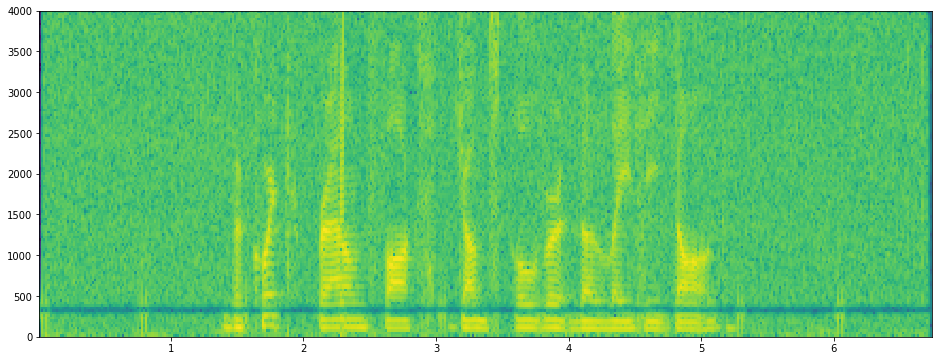

Run time: 1.656 s


In [11]:
#1.e) convle and check
nobeep=np.convolve(fox,band)
time_start = time.process_time()
plt.figure(figsize=(16,6))
plt.specgram(nobeep, Fs=fs)
plt.show()
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.3f s" % time_elapsed)
#remove the beep from alound the 300 band

In [12]:
new = np.asarray(nobeep,dtype=np.int16)
wavfile.write("nobeep_fox.wav",fs,new)
IPython.display.Audio("nobeep_fox.wav")
#confrim removal of beeps

In [13]:
#2.Importing the yes and no wave
from scipy.io import wavfile
#Tsui
fs, data = wavfile.read("Tsui_no_16kHz.wav") #fs is the sampling rate
Tsui_no = data 
fs, data = wavfile.read("Tsui_yes_16kHz.wav") #fs is the sampling rate
Tsui_yes = data 
#Wong
fs, data = wavfile.read("Wong_no_16kHz.wav") #fs is the sampling rate
Wong_no = data 
fs, data = wavfile.read("Wong_yes_16kHz.wav") #fs is the sampling rate
Wong_yes = data 
#Cote
fs, data = wavfile.read("Cote_No_16kHz.wav") #fs is the sampling rate
Cote_no = data 
fs, data = wavfile.read("Cote_Yes_16kHz.wav") #fs is the sampling rate
Cote_yes = data 
#Hilborn
fs, data = wavfile.read("Hilborn_No_16kHz.wav") #fs is the sampling rate
Hilborn_no = data 
fs, data = wavfile.read("Hilborn_Yes_16kHz.wav") #fs is the sampling rate
Hilborn_yes = data
#Chen
fs, data = wavfile.read("Chen_No_16kHz.wav") #fs is the sampling rate
Chen_no = data 
fs, data = wavfile.read("Chen_Yes_16kHz.wav") #fs is the sampling rate
Chen_yes = data
#Geddert
fs, data = wavfile.read("Geddert_No_16kHz.wav") #fs is the sampling rate
Geddert_no = data 
fs, data = wavfile.read("Geddert_Yes_16kHz.wav") #fs is the sampling rate
Geddert_yes = data

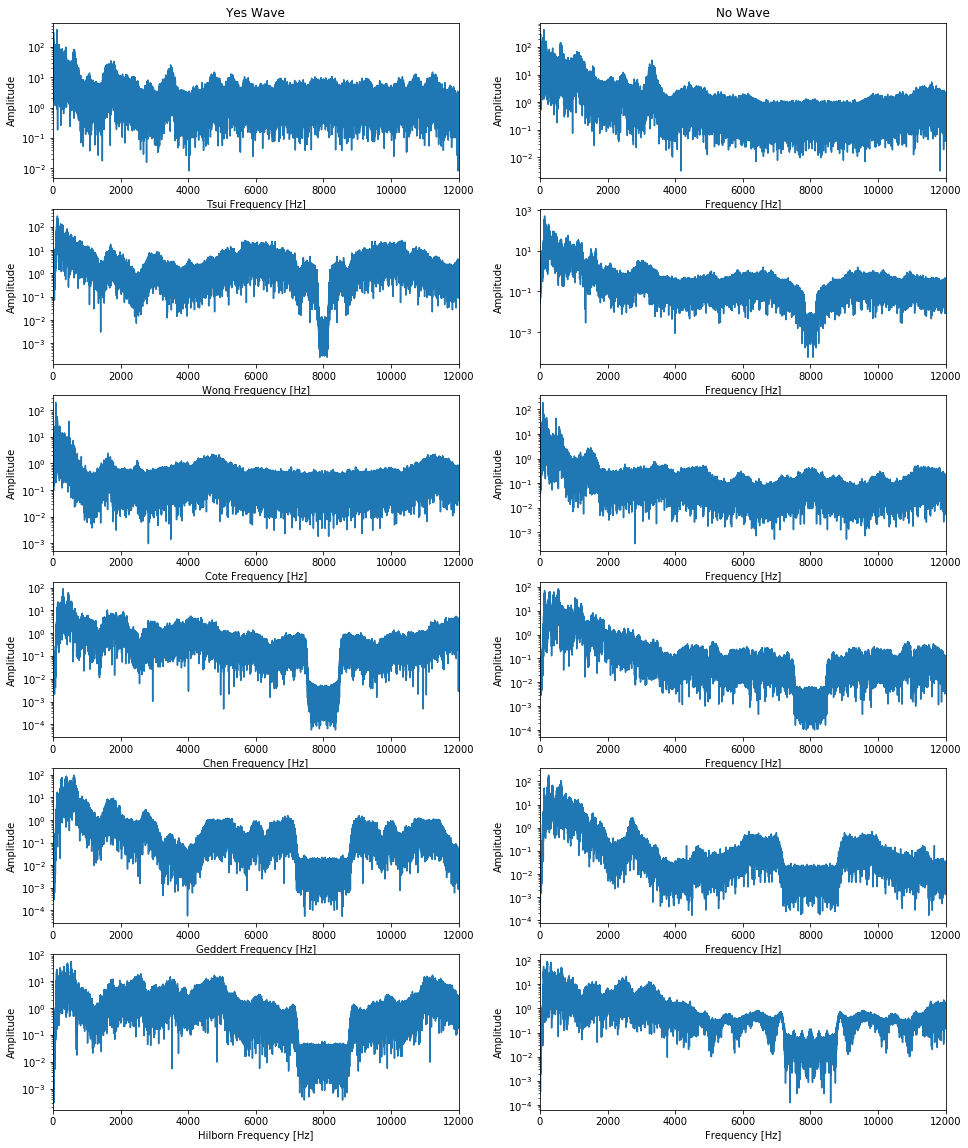

In [14]:
#2. a) difference between Yes and no
plt.figure(figsize=(16,20))

Tsui_ffty = np.fft.fft(Tsui_yes) 
N = len(Tsui_yes)
fty = np.linspace(0, fs, N) 
plt.subplot(621)
plt.title("Yes Wave")
plt.ylabel("Amplitude")
plt.xlabel("Tsui Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fty,np.abs(Tsui_ffty)/N)


Tsui_fftn = np.fft.fft(Tsui_no) 
N = len(Tsui_no)
ftn = np.linspace(0, fs, N) 
plt.subplot(622)
#plt.figure(figsize=(16,6))
plt.title("No Wave")
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(ftn,np.abs(Tsui_fftn)/N)

#wong
Wong_ffty = np.fft.fft(Wong_yes) 
N = len(Wong_yes)
fwy = np.linspace(0, fs, N) 
plt.subplot(623)
plt.ylabel("Amplitude")
plt.xlabel("Wong Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fwy,np.abs(Wong_ffty)/N)


Wong_fftn = np.fft.fft(Wong_no) 
N = len(Wong_no)
fwn = np.linspace(0, fs, N) 
plt.subplot(624)
#plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fwn,np.abs(Wong_fftn)/N)
#Cote
Cote_ffty = np.fft.fft(Cote_yes) 
N = len(Cote_yes)
fcoy = np.linspace(0, fs, N) 
plt.subplot(625)
plt.ylabel("Amplitude")
plt.xlabel("Cote Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fcoy,np.abs(Cote_ffty)/N)

Cote_fftn = np.fft.fft(Cote_no) 
N = len(Cote_no)
fcon = np.linspace(0, fs, N) 
plt.subplot(626)
#plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fcon,np.abs(Cote_fftn)/N)
#Chen
Chen_ffty = np.fft.fft(Chen_yes) 
N = len(Chen_yes)
fchy = np.linspace(0, fs, N) 
plt.subplot(627)
plt.ylabel("Amplitude")
plt.xlabel("Chen Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fchy,np.abs(Chen_ffty)/N)

Chen_fftn = np.fft.fft(Chen_no) 
N = len(Chen_no)
fchn = np.linspace(0, fs, N) 
plt.subplot(628)
#plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fchn,np.abs(Chen_fftn)/N)
#Geddert
Geddert_ffty = np.fft.fft(Geddert_yes) 
N = len(Geddert_yes)
fgy = np.linspace(0, fs, N) 
plt.subplot(629)
plt.ylabel("Amplitude")
plt.xlabel("Geddert Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fgy,np.abs(Geddert_ffty)/N)

Geddert_fftn = np.fft.fft(Geddert_no) 
N = len(Geddert_no)
fgn = np.linspace(0, fs, N) 
plt.subplot(6,2,10)
#plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fgn,np.abs(Geddert_fftn)/N)
#Hilborn
Hilborn_ffty = np.fft.fft(Hilborn_yes) 
N = len(Hilborn_yes)
fhy = np.linspace(0, fs, N) 
plt.subplot(6,2,11)
plt.ylabel("Amplitude")
plt.xlabel("Hilborn Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fhy,np.abs(Hilborn_ffty)/N)

Hilborn_fftn = np.fft.fft(Hilborn_no) 
N = len(Hilborn_no)
fhn = np.linspace(0, fs, N) 
plt.subplot(6,2,12)
#plt.figure(figsize=(16,6))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
#plt.axis([0,500,0,65536])
plt.xlim(0,12000)
plt.yscale('log')
plt.plot(fhn,np.abs(Hilborn_fftn)/N)
plt.show()

In [15]:
#2.a)
#the difference bwtween yes and no is due to the pronousiation producing different freq of sound
#2.b) the ratio of the sound from above 4khz compare to the whole sample will determine my yes or no
#the yes will have more high freq sounds therefore the ratio will be higher than no
fcut=np.where(fty>4000)#index freq grater than 4000Hz, chosen do to distent drop
ratioy = np.sum(np.abs(Tsui_ffty[fcut]))/np.sum(np.abs(Tsui_ffty))
fcut=np.where(ftn>4000)
ration = np.sum(np.abs(Tsui_fftn[fcut]))/np.sum(np.abs(Tsui_fftn))
print("Tsui yes:",ratioy," Tusi no:",ration)

fcut=np.where(fchy>4000)
ratioy = np.sum(np.abs(Chen_ffty[fcut]))/np.sum(np.abs(Chen_ffty))
fcut=np.where(fchn>4000)
ration = np.sum(np.abs(Chen_fftn[fcut]))/np.sum(np.abs(Chen_fftn))
print("Chen yes:",ratioy," Chen no:",ration)

fcut=np.where(fcoy>4000)
ratioy = np.sum(np.abs(Cote_ffty[fcut]))/np.sum(np.abs(Cote_ffty))
fcut=np.where(fcon>4000)
ration = np.sum(np.abs(Cote_fftn[fcut]))/np.sum(np.abs(Cote_fftn))
print("Cote yes:",ratioy," Cote no:",ration)

fcut=np.where(fwy>4000)
ratioy = np.sum(np.abs(Wong_ffty[fcut]))/np.sum(np.abs(Wong_ffty))
fcut=np.where(fwn>4000)
ration = np.sum(np.abs(Wong_fftn[fcut]))/np.sum(np.abs(Wong_fftn))
print("Wong yes:",ratioy," Wong no:",ration)

fcut=np.where(fgy>4000)
ratioy = np.sum(np.abs(Geddert_ffty[fcut]))/np.sum(np.abs(Geddert_ffty))
fcut=np.where(fgn>4000)
ration = np.sum(np.abs(Geddert_fftn[fcut]))/np.sum(np.abs(Geddert_fftn))
print("Geddert yes:",ratioy," Geddert no:",ration)

#Hilborn
fcut=np.where(fhy>4000)
ratioy = np.sum(np.abs(Hilborn_ffty[fcut]))/np.sum(np.abs(Hilborn_ffty))
fcut=np.where(fhn>4000)
ration = np.sum(np.abs(Hilborn_fftn[fcut]))/np.sum(np.abs(Hilborn_fftn))
print("Hilborn yes:",ratioy," Hilborn no:",ration)
#mostly okay but due to some freq abow 8khz not showing up ratio don't always work out

Tsui yes: 0.6346162091592698  Tusi no: 0.5344821825014208
Chen yes: 0.5815856535918933  Chen no: 0.5110532913991607
Cote yes: 0.6181666626756446  Cote no: 0.5347136177060673
Wong yes: 0.6780297734509841  Wong no: 0.5157414872417745
Geddert yes: 0.5267246615275545  Geddert no: 0.5082551038222762
Hilborn yes: 0.645363138878247  Hilborn no: 0.5357113180626923


In [16]:
#retry with different range of limit 
ratioy=[0]*6
ration=[0]*6
lim = 6000
lim1 =5000
fcut=np.where((fty<lim)&(fty>lim1))#index freq less than 6000Hz, chosen do to avoid sudden error
ratioy[0] = np.sum(np.abs(Tsui_ffty[fcut]))/np.sum(np.abs(Tsui_ffty))
fcut=np.where((ftn<lim)&(ftn>lim1))
ration[0] = np.sum(np.abs(Tsui_fftn[fcut]))/np.sum(np.abs(Tsui_fftn))
print("Tsui yes:",ratioy[0]," Tusi no:",ration[0])

fcut=np.where((fchy<lim)&(fchy>lim1))
ratioy[1] = np.sum(np.abs(Chen_ffty[fcut]))/np.sum(np.abs(Chen_ffty))
fcut=np.where((fchn<lim)&(fchn>lim1))
ration[1] = np.sum(np.abs(Chen_fftn[fcut]))/np.sum(np.abs(Chen_fftn))
print("Chen yes:",ratioy[1]," Chen no:",ration[1])

fcut=np.where((fcoy<lim)&(fcoy>lim1))
ratioy[2] = np.sum(np.abs(Cote_ffty[fcut]))/np.sum(np.abs(Cote_ffty))
fcut=np.where((fcon<lim)&(fcon>lim1))
ration[2] = np.sum(np.abs(Cote_fftn[fcut]))/np.sum(np.abs(Cote_fftn))
print("Cote yes:",ratioy[2]," Cote no:",ration[2] )

fcut=np.where((fwy<lim)&(fwy>lim1))
ratioy[3] = np.sum(np.abs(Wong_ffty[fcut]))/np.sum(np.abs(Wong_ffty))
fcut=np.where((fwn<lim)&(fwn>lim1))
ration[3] = np.sum(np.abs(Wong_fftn[fcut]))/np.sum(np.abs(Wong_fftn))
print("Wong yes:",ratioy[3]," Wong no:",ration[3] )

fcut=np.where((fgy<lim)&(fgy>lim1))
ratioy[4] = np.sum(np.abs(Geddert_ffty[fcut]))/np.sum(np.abs(Geddert_ffty))
fcut=np.where((fgn<lim)&(fgn>lim1))
ration[4] = np.sum(np.abs(Geddert_fftn[fcut]))/np.sum(np.abs(Geddert_fftn))
print("Geddert yes:",ratioy[4] ," Geddert no:",ration[4] )

#Hilborn
fcut=np.where((fhy<lim)&(fhy>lim1))
ratioy[5] = np.sum(np.abs(Hilborn_ffty[fcut]))/np.sum(np.abs(Hilborn_ffty))
fcut=np.where((fhn<lim)&(fhn>lim1))
ration[5] = np.sum(np.abs(Hilborn_fftn[fcut]))/np.sum(np.abs(Hilborn_fftn))
print("Hilborn yes:",ratioy[5] ," Hilborn no:",ration[5] )
#set a small range to avoid flux in freq readings

Tsui yes: 0.03479366539708835  Tusi no: 0.007976613756157283
Chen yes: 0.016865144998684876  Chen no: 0.0034092211867772873
Cote yes: 0.02783887110645831  Cote no: 0.0065025552401218045
Wong yes: 0.06990611894666497  Wong no: 0.004446787416892263
Geddert yes: 0.008539623373858538  Geddert no: 0.0013254431659599677
Hilborn yes: 0.033840155805597856  Hilborn no: 0.007028113365526047


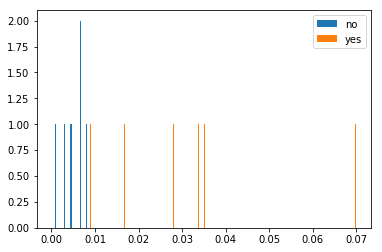

In [17]:
#2.c) plot hist to confirm readings
bins = np.linspace(0.00, 0.07, 100)
plt.hist([ration, ratioy], bins, label=['no', 'yes'])
plt.legend(loc='upper right')
plt.show()
#check if viable
#5000 to 6000 seem work fine

In [35]:
#make a function that take in data from wave file and find if it's yes or no
from scipy.io import wavfile
def YesOrNo(Wave):
    fs, data = wavfile.read(Wave) #fs is the sampling rate
    fft = np.fft.fft(data) 
    N = len(data)
    f = np.linspace(0, fs, N)
    fcut= np.where((5000<f)&(f<6000))
    deter = np.sum(np.abs(fft[fcut]))/np.sum(np.abs(fft))
    if (deter > 0.008):
        print(Wave," is Yes")
    else:
        print(Wave," is No")
    return

In [37]:
#test
YesOrNo("Wong_no_16kHz.wav")
YesOrNo("Wong_yes_16kHz.wav")

YesOrNo("Tsui_no_16kHz.wav")
YesOrNo("Tsui_yes_16kHz.wav")

YesOrNo("Cote_No_16kHz.wav")
YesOrNo("Cote_Yes_16kHz.wav")

YesOrNo("Hilborn_No_16kHz.wav")
YesOrNo("Hilborn_Yes_16kHz.wav")

YesOrNo("Chen_No_16kHz.wav")
YesOrNo("Chen_Yes_16kHz.wav")

YesOrNo("Geddert_No_16kHz.wav")
YesOrNo("Geddert_Yes_16kHz.wav")

#seems fine

Wong_no_16kHz.wav  is No
Wong_yes_16kHz.wav  is Yes
Tsui_no_16kHz.wav  is No
Tsui_yes_16kHz.wav  is Yes
Cote_No_16kHz.wav  is No
Cote_Yes_16kHz.wav  is Yes
Hilborn_No_16kHz.wav  is No
Hilborn_Yes_16kHz.wav  is Yes
Chen_No_16kHz.wav  is No
Chen_Yes_16kHz.wav  is Yes
Geddert_No_16kHz.wav  is No
Geddert_Yes_16kHz.wav  is Yes
